In [96]:
# Euro Exchange Rate Analysis

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline
plt.style.use('seaborn-white')

In [98]:
# Read our data into dataframe
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-03-26,1.5459,1.9558,6.7110,1.4814,1.1090,7.7063,NaN,26.081,7.4361,...,4.8878,89.5075,10.1905,1.5865,NaN,NaN,36.6540,9.4523,1.1782,17.6845
1,2021-03-25,1.5548,1.9558,6.6960,1.4849,1.1045,7.7220,NaN,26.233,7.4360,...,4.8865,90.0115,10.1935,1.5899,NaN,NaN,36.7460,9.4313,1.1802,17.6852
2,2021-03-24,1.5532,1.9558,6.5258,1.4884,1.1068,7.7133,NaN,26.206,7.4360,...,4.8880,90.2013,10.1635,1.5917,NaN,NaN,36.6580,9.4009,1.1825,17.5248
3,2021-03-23,1.5491,1.9558,6.5562,1.4938,1.1066,7.7367,NaN,26.198,7.4360,...,4.8893,90.2781,10.1813,1.5955,NaN,NaN,36.8190,9.3638,1.1883,17.5818
4,2021-03-22,1.5400,1.9558,6.5917,1.4903,1.1023,7.7582,NaN,26.075,7.4360,...,4.8862,88.9011,10.1580,1.5992,NaN,NaN,36.8160,9.4097,1.1926,17.5657


In [99]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5749,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5750,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5751,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5752,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5753,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [100]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5754 non-null   object 
 1   [Australian dollar ]      5754 non-null   object 
 2   [Bulgarian lev ]          5352 non-null   object 
 3   [Brazilian real ]         5486 non-null   object 
 4   [Canadian dollar ]        5754 non-null   object 
 5   [Swiss franc ]            5754 non-null   object 
 6   [Chinese yuan renminbi ]  5486 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5754 non-null   object 
 9   [Danish krone ]           5754 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5754 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5754 non-null   object 
 14  [Croatia

In [101]:
# Rename US dollar and Period\\Unit columns
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'}, inplace = True)

# Change Time column to datetime data type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort Time values in ascending order
exchange_rates.sort_values('Time', inplace=True)

# Reset the index and drop the initial index
exchange_rates.reset_index(drop=True, inplace=False)

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,2021-03-22,1.5400,1.9558,6.5917,1.4903,1.1023,7.7582,NaN,26.075,7.4360,...,4.8862,88.9011,10.1580,1.5992,NaN,NaN,36.8160,9.4097,1.1926,17.5657
5750,2021-03-23,1.5491,1.9558,6.5562,1.4938,1.1066,7.7367,NaN,26.198,7.4360,...,4.8893,90.2781,10.1813,1.5955,NaN,NaN,36.8190,9.3638,1.1883,17.5818
5751,2021-03-24,1.5532,1.9558,6.5258,1.4884,1.1068,7.7133,NaN,26.206,7.4360,...,4.8880,90.2013,10.1635,1.5917,NaN,NaN,36.6580,9.4009,1.1825,17.5248
5752,2021-03-25,1.5548,1.9558,6.6960,1.4849,1.1045,7.7220,NaN,26.233,7.4360,...,4.8865,90.0115,10.1935,1.5899,NaN,NaN,36.7460,9.4313,1.1802,17.6852


In [102]:
# Assigning Time and US_dollar to new variable
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar.head()

,Time,US_dollar
5753,1999-01-04,1.1789
5752,1999-01-05,1.1790
5751,1999-01-06,1.1743
5750,1999-01-07,1.1632
5749,1999-01-08,1.1659


In [103]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.1088     1
1.1361     1
1.2585     1
0.9264     1
0.8377     1
Name: US_dollar, Length: 3543, dtype: int64

In [104]:
# This shows there are 62 instances of '-'
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5754 entries, 5753 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5754 non-null   datetime64[ns]
 1   US_dollar  5754 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 134.9+ KB


In [105]:
# Remove all rows that have '-' as US_dollar value and convert US_dollars to float
euro_to_dollar.drop(index=euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index, inplace=True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1346    6
1.3532    6
         ..
1.5566    1
1.2467    1
1.2208    1
0.8907    1
1.3937    1
Name: US_dollar, Length: 3542, dtype: int64

In [106]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 5753 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5692 non-null   datetime64[ns]
 1   US_dollar  5692 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.4 KB


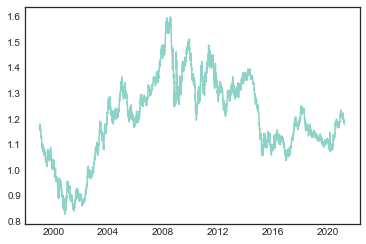

In [107]:
# Plotting the Euro to Dollar conversion rate over time
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

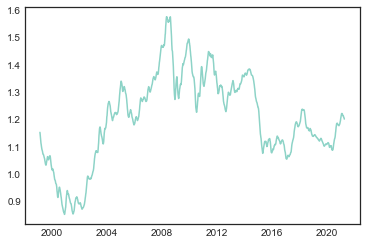

In [110]:
# Find the 30 day rolling mean and plot
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()